In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

## Tumor Response to Treatment

In [24]:
df = pd.merge(mouse_data, trial_data, how="left", on=["Mouse ID", "Mouse ID"])

tumor_mean = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean

tumor_se = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
table_mean = tumor_mean.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")
table_se = tumor_se.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")

df1 = table_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]# make a new data frame with selected columns
df2 = table_se[["Capomulin","Infubinol","Ketapril","Placebo"]]
table_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


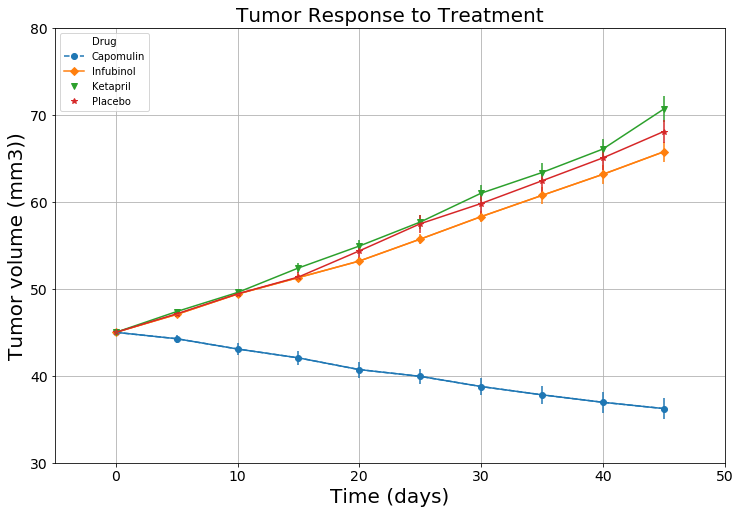

In [51]:
ax = df1.plot(figsize=(12,8), yerr = df2, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df1.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=6, ax = ax)

plt.title("Tumor Response to Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(30, 80)
plt.axhline(0.4)
plt.grid(True)
plt.savefig("tumor_response.png")
plt.show()

## Metastatic Response to Treatment

In [27]:

met_mean = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().reset_index()
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [28]:
met_se = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().reset_index()
met_se.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [29]:

met_mean = met_mean.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
met_se = met_se.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
met_mean.head()

df3 = met_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]# make a new data frame with selected columns
df4 = met_se[["Capomulin","Infubinol","Ketapril","Placebo"]]

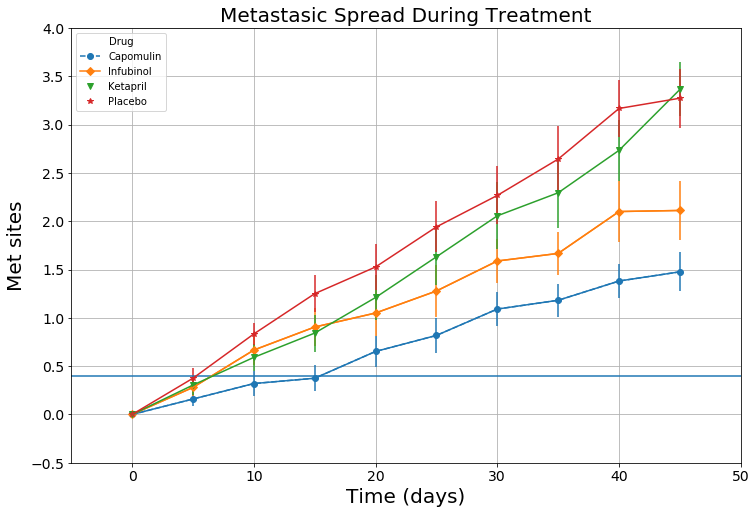

In [50]:

ax = df3.plot(figsize=(12,8), yerr = df4, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
df3.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=6, ax = ax)

plt.title("Metastasic Spread During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Met sites")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(-0.5, 4)
plt.axhline(0.4)
plt.grid(True)
plt.savefig("Met_spread.png")
plt.show()

## Survival Rates

In [31]:

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
mouse_count = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mouse_table = mouse_count.pivot_table(values ="Mouse Count", index ="Timepoint", columns ="Drug")

df5 = mouse_table[["Capomulin","Infubinol","Ketapril","Placebo"]]
mouse_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [33]:

df5['Capomulin Survival'] = (df5['Capomulin']/25)*100
df5['Infubinol Survival'] = (df5['Infubinol']/25)*100
df5['Ketapril Survival'] = (df5['Ketapril']/25)*100
df5['Placebo Survival'] = (df5['Placebo']/25)*100
df_survival = df5[['Capomulin Survival', 'Infubinol Survival', 'Ketapril Survival', 'Placebo Survival']]

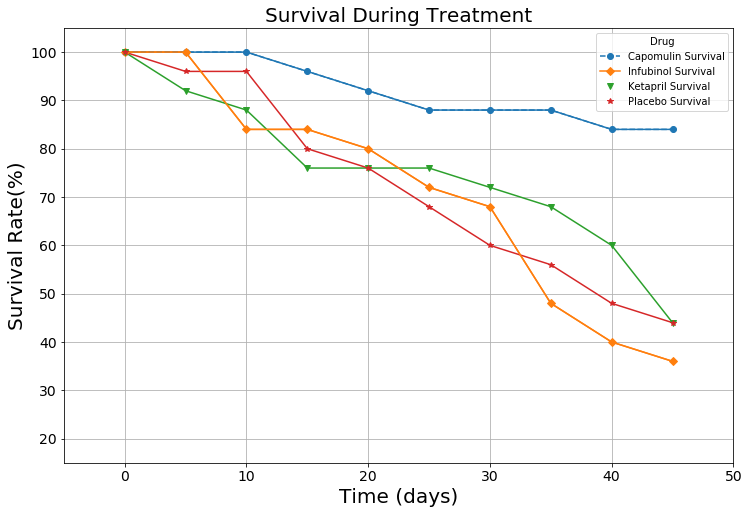

In [49]:

ax = df_survival.plot(figsize=(12,8), legend = False)
ax.set_prop_cycle(None)
df_survival.plot(figsize=(12,8), style=['o--', 'D-', 'v', '*'], markersize=6, ax = ax)

plt.title("Survival During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate(%)")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(15, 105)
plt.axhline(0.4)
plt.grid(True)
plt.savefig("mouse_survival.png")
plt.show()

## Summary Bar Graph

In [35]:

table_mean['Capomulin tumor'] = ((table_mean['Capomulin']/45)*100)-100
table_mean['Infubinol tumor'] = ((table_mean['Infubinol']/45)*100)-100
table_mean['Ketapril tumor'] = ((table_mean['Ketapril']/45)*100)-100
table_mean['Naftisol tumor'] = ((table_mean['Naftisol']/45)*100)-100
table_mean['Placebo tumor'] = ((table_mean['Placebo']/45)*100)-100
table_mean['Propriva tumor'] = ((table_mean['Propriva']/45)*100)-100
table_mean['Ramicane tumor'] = ((table_mean['Ramicane']/45)*100)-100
table_mean['Stelasyn tumor'] = ((table_mean['Stelasyn']/45)*100)-100
table_mean['Zoniferol tumor'] = ((table_mean['Zoniferol']/45)*100)-100
tumor_growth1 = table_mean[['Capomulin tumor', 'Infubinol tumor', 'Ketapril tumor', 'Naftisol tumor', 'Placebo tumor', 'Propriva tumor', 'Ramicane tumor', 'Stelasyn tumor', 'Zoniferol tumor']]
tumor_growth1 = tumor_growth1.rename(columns={'Capomulin tumor':'Capomulin', 'Infubinol tumor':'Infubinol', 'Ketapril tumor':'Ketapril', 'Naftisol tumor':'Naftisol', 'Placebo tumor':'Placebo', 'Propriva tumor':'Propriva', 'Ramicane tumor':'Ramicane', 'Stelasyn tumor':'Stealsyn', 'Zoniferol tumor':'Zoniferol'})
tumor_growth1.loc[45, :]

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stealsyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [38]:
tumor_growth = tumor_growth1[['Capomulin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stealsyn', 'Zoniferol']]
tumor_growth_df = pd.DataFrame(tumor_growth.loc[45, :])
#growth_df = tumor_growth_df.reset_index()
growth_df = tumor_growth_df
growth_df = growth_df.rename(columns={45:'% Tumor Volume Change'})
a=growth_df.index.values.tolist()
b=list(growth_df['% Tumor Volume Change'])

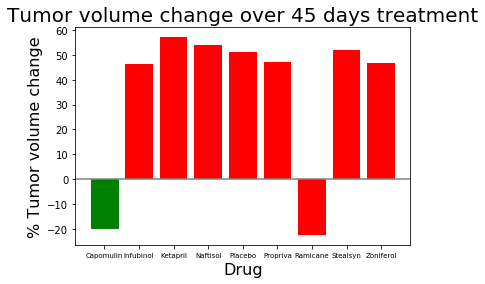

In [44]:
ax=plt.bar(a, b, facecolor="red")
ax[0].set_color('g')
plt.ylabel("% Tumor volume change").set_size(16)
plt.xlabel("Drug").set_size(16)
plt.title("Tumor volume change over 45 days treatment").set_size(20)
plt.tick_params(axis="x", labelsize=7) #Estas cosas no funcionan :(
plt.tick_params(axis="y", labelsize=10)#Estas cosas no funcionan :(
plt.axhline(0, color='grey')

plt.savefig("tumor_change.png")
plt.show()